In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats


## Task Description

Data recorded belong to two blocks or task categories:
- $B1$ or Block 1: There is no risk of punishment
- $B2$ or Block 2: There is a 50% risk of punishment associated with large reward

### Initial Research Questions
1)	Can you use features of the data to predict whether a trial is in block 1 or block 2 (0% risk vs 50% risk)\
2)	In block 2, can you use features of the data to predict which decision they make?\
3)	Does whether a previous trial was punished or not influence features of the data?

### More Research Questions
1) Can we determine individual difference in decision making based on the mapping between mapping btn neural outpuut and behavioral results (e.g. Male Vs Female, Young vs Adult)?

2)  From neural response can we tell in which stage (Lights PreChoice,Deliberation, PreDecision, Decision) do rodents make up their mind to choose to choose safe vs risky reward?

3) Which individual or group of neurons are more responsible for the choice of safe or risky reward?
4) Based on the choice of the reward over number of trials from both B1 and B2, can we classify a rodent as a risk taker or risk avoider?




## Neural and Behavioral data description
### 1. Behavioral outputs
##### - B1DecisionOrder
Behavioral measure listing the order of reward choice during block 1. Each row corresponds to a single trial. The reward chosen here is the same for all B1 fields. Noncompleted trials may result in fewer than 40 rows. 
$1$ = Large/risky reward
$2$ = Small/safe reward

Each row below corresponds to a single neuron data and each collumn corresponds to the single trial data.\
So for B1 we have 149 neuraons and 40 trials (149 x 40) and for B2 we have same number of neurons but some of the trials have empty values (NAN).

- $1$ corresponds to large/risky reward
- $2$ Corresponds to small/safe reward





In [2]:
data_pathB1=r"C:\Users\fhvgmana\Documents\summer_2021_research\Rodents\data\B1\\"
data_pathB2= r"C:\Users\fhvgmana\Documents\summer_2021_research\Rodents\data\B2\\"

b1_order=pd.read_csv(data_pathB1+"B1DecisionOrder.CSV", header=None)
b2_order=pd.read_csv(data_pathB2+"B2DecisionOrder.CSV",header=None)

In [3]:
print("-------------------Decision order for Non-risk task (B1)----------------")
b1_order

-------------------Decision order for Non-risk task (B1)----------------


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
144,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
145,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
146,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
print("-------------------Decision order for risk task (B2)----------------")
b2_order

-------------------Decision order for risk task (B2)----------------


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1,1,1,1,1,1,1,1,2,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,1,1,1,1,1,1,1,2,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1,1,1,1,1,1,1,1,2,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1,1,1,1,1,1,1,1,2,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1,1,1,1,1,1,1,1,2,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
144,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
145,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
146,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Latencies
Behavioral measure listing the time in seconds the subject took to press a lever following each lever extension. The lever pressed in each trial follows the order of B1DecisionOrder. Noncompleted trials result in empty cells replaced with NaN.
- Each row is single neuron records (148 Neurons)
- Each collumn contains trial by trial record (40 trials)



In [5]:
b1_latencies= pd.read_csv(data_pathB1+"B1Latencies.CSV",header=None)
b2_latencies= pd.read_csv(data_pathB2+"B2Latencies.CSV",header=None)
print('------------------B1 latencies after lever extension---------------')
b1_latencies.head(10)

------------------B1 latencies after lever extension---------------


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.82,0.93,0.90,2.90,1.3,0.88,1.62,1.31,1.07,1.00,...,0.87,3.64,5.00,0.93,1.00,0.96,1.17,3.49,0.99,0.96
1,0.82,0.93,0.90,2.90,1.3,0.88,1.62,1.31,1.07,1.00,...,0.87,3.64,5.00,0.93,1.00,0.96,1.17,3.49,0.99,0.96
2,0.82,0.93,0.90,2.90,1.3,0.88,1.62,1.31,1.07,1.00,...,0.87,3.64,5.00,0.93,1.00,0.96,1.17,3.49,0.99,0.96
3,0.82,0.93,0.90,2.90,1.3,0.88,1.62,1.31,1.07,1.00,...,0.87,3.64,5.00,0.93,1.00,0.96,1.17,3.49,0.99,0.96
4,0.82,0.93,0.90,2.90,1.3,0.88,1.62,1.31,1.07,1.00,...,0.87,3.64,5.00,0.93,1.00,0.96,1.17,3.49,0.99,0.96
5,0.87,1.63,1.01,1.06,1.1,0.99,1.09,1.35,1.63,1.11,...,1.77,2.09,1.38,1.43,2.36,1.74,1.38,2.51,1.16,1.01
6,0.87,1.63,1.01,1.06,1.1,0.99,1.09,1.35,1.63,1.11,...,1.77,2.09,1.38,1.43,2.36,1.74,1.38,2.51,1.16,1.01
7,0.87,1.63,1.01,1.06,1.1,0.99,1.09,1.35,1.63,1.11,...,1.77,2.09,1.38,1.43,2.36,1.74,1.38,2.51,1.16,1.01
8,0.87,1.63,1.01,1.06,1.1,0.99,1.09,1.35,1.63,1.11,...,1.77,2.09,1.38,1.43,2.36,1.74,1.38,2.51,1.16,1.01
9,0.87,1.63,1.01,1.06,1.1,0.99,1.09,1.35,1.63,1.11,...,1.77,2.09,1.38,1.43,2.36,1.74,1.38,2.51,1.16,1.01


In [6]:
print('------------------B2 latencies after lever extension---------------')
b2_latencies.head(10)

------------------B2 latencies after lever extension---------------


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,4.53,5.02,1.03,3.78,3.82,5.33,2.82,2.22,1.29,0.93,...,1.23,1.18,0.89,1.13,1.03,1.18,4.27,1.83,0.93,3.65
1,4.53,5.02,1.03,3.78,3.82,5.33,2.82,2.22,1.29,0.93,...,1.23,1.18,0.89,1.13,1.03,1.18,4.27,1.83,0.93,3.65
2,4.53,5.02,1.03,3.78,3.82,5.33,2.82,2.22,1.29,0.93,...,1.23,1.18,0.89,1.13,1.03,1.18,4.27,1.83,0.93,3.65
3,4.53,5.02,1.03,3.78,3.82,5.33,2.82,2.22,1.29,0.93,...,1.23,1.18,0.89,1.13,1.03,1.18,4.27,1.83,0.93,3.65
4,4.53,5.02,1.03,3.78,3.82,5.33,2.82,2.22,1.29,0.93,...,1.23,1.18,0.89,1.13,1.03,1.18,4.27,1.83,0.93,3.65
5,1.87,4.49,3.81,4.08,8.76,8.88,9.84,5.97,6.47,2.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.87,4.49,3.81,4.08,8.76,8.88,9.84,5.97,6.47,2.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.87,4.49,3.81,4.08,8.76,8.88,9.84,5.97,6.47,2.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.87,4.49,3.81,4.08,8.76,8.88,9.84,5.97,6.47,2.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.87,4.49,3.81,4.08,8.76,8.88,9.84,5.97,6.47,2.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


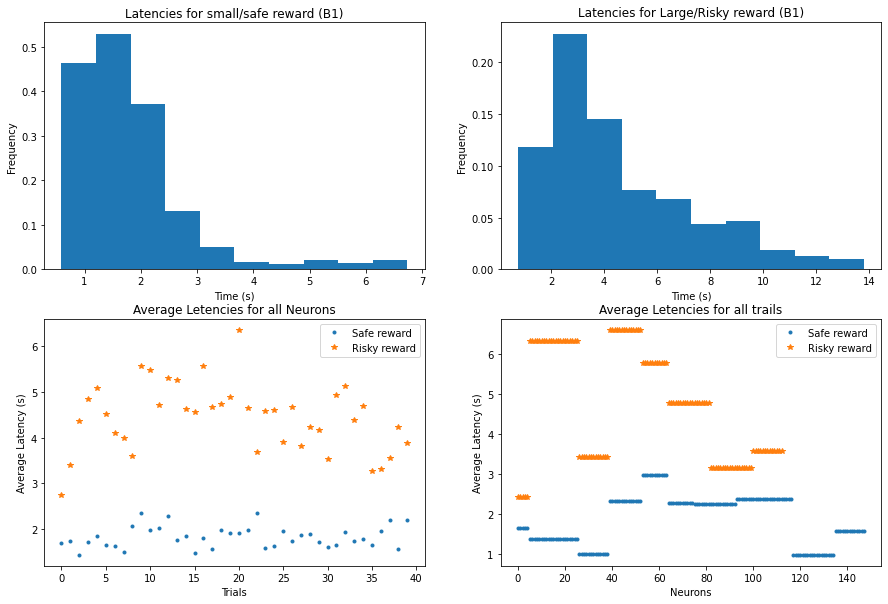

In [7]:
# masked_data = np.ma.masked_array(b2_latencies, np.isnan(b1_latencies))
b2_latencies_new=b2_latencies.dropna(axis=0,how="all")
# print(b2_latencies_new.shape)
bb1=np.array(b1_latencies).flatten()
bb2=np.array(b2_latencies).flatten()
## Calculate average latency for all neurons
latency_avNeur=[np.nanmean(b1_latencies,axis=0),np.nanmean(b2_latencies_new,axis=0)] 

# Calculate average latency for all trials
latency_avTrial=[np.nanmean(b1_latencies,axis=1),np.nanmean(b2_latencies_new,axis=1)]

fig,axes =plt.subplots(nrows=2,ncols=2,figsize=(15,10))
plt.subplot(221)
plt.hist(bb1,density=True)

plt.title("Latencies for small/safe reward (B1)"),plt.xlabel("Time (s)"),plt.ylabel("Frequency")

plt.subplot(222)
plt.hist(bb2,density=True)
plt.title("Latencies for Large/Risky reward (B1)"),plt.xlabel("Time (s)"),plt.ylabel("Frequency")

plt.subplot(223)
plt.plot(latency_avNeur[0],'.')
plt.plot(latency_avNeur[1],'*')
plt.legend(["Safe reward","Risky reward"])
plt.title("Average Letencies for all Neurons"),plt.xlabel("Trials"),plt.ylabel("Average Latency (s)")

plt.subplot(224)
plt.plot(latency_avTrial[0],".")
plt.plot(latency_avTrial[1],"*")
plt.legend(["Safe reward","Risky reward"])
plt.legend(["Safe reward","Risky reward"])
plt.title("Average Letencies for all trails"),plt.xlabel("Neurons"),plt.ylabel("Average Latency (s)")

plt.show()

### WinLossOrder
Behavioral measure listing the order of reward choice and the corresponding outcome.\
Each row corresponds to a single trial.\
The reward chosen here is the same for all B1 fields.
1 = Small/safe reward\
2 = Large/risky reward, not punished\
3 = Large/risky reward, punished\
NaN = subject did not complete this trial



### B1WinLossOrder

Behavioral measure listing the order of reward choice and the corresponding outcome. Each row corresponds to a single trial. The reward chosen here is the same for all B1 fields.\
1 = Small/safe reward\
2 = Large/risky reward, not punished\
3 = Large/risky reward, punished\
NaN = subject did not complete this trial




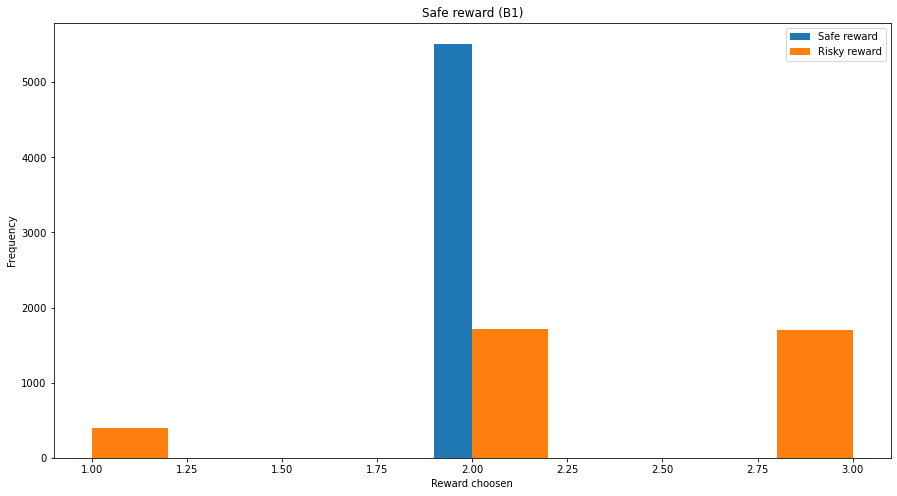

In [8]:
b1winloss= pd.read_csv(data_pathB1+"B1WinLossOrder.CSV",header=None)
b2winloss= pd.read_csv(data_pathB2+"B2WinLossOrder.CSV",header=None)
b1=np.array(b1winloss).flatten()
b2=np.array(b2winloss).flatten()
plt.figure(figsize=(15,8))
plt.hist(b1)
plt.hist(b2)
plt.title("Safe reward (B1)"),plt.xlabel("Reward choosen"),plt.ylabel("Frequency")
plt.legend(["Safe reward","Risky reward"])
plt.show()

### B1PrevTrialWinLoss

Behavioral measure listing whether the previous choice trial was punished or not punished. The first row of this event structure is NaN because there is no choice trial preceding it. Noncompleted trials result in empty cells replaced with NaN.\
1 = Small/safe reward\
2 = Large/risky reward, not punished\
3 = Large/risky reward, punished\
NaN = subject did not complete this trial




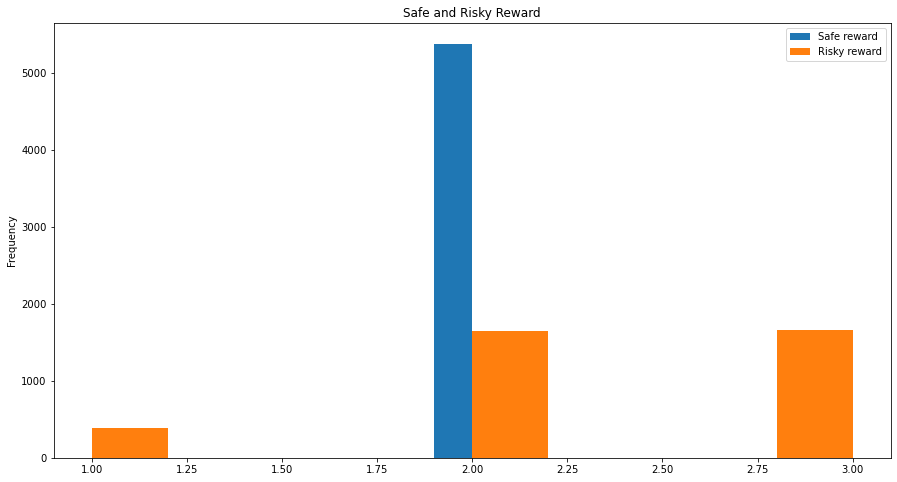

In [9]:
b1prevwinloss= pd.read_csv(data_pathB1+"B1PrevTrialWinLoss.CSV",header=None)
b2prevwinloss= pd.read_csv(data_pathB2+"B2PrevTrialWinLoss.CSV",header=None)
b1prev=np.array(b1prevwinloss).flatten()
b2prev=np.array(b2prevwinloss).flatten()
plt.figure(figsize=(15,8))
plt.hist(b1prev)
plt.hist(b2prev)
plt.title("Safe and Risky Reward"),plt.ylabel("Frequency")
plt.legend(["Safe reward","Risky reward"])
plt.show()

In [41]:
b1winloss.T

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
8,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


## 2. Neural Output

Each row is a single trial consisting of 50ms bins.

Event: Task event represented by the structure field\
Window: Length in seconds of the structure field\
Bin of Event: The bin/column of the structure field in which the event happens\
Bins are 50ms



### B1LightsPreChoice
Event: lights illuminating to mark the start of a trial\
Window: 0.5 sec\
Bin of event: Lights illuminated at bin 1\
Notes: May overlap with beginning of B1Deliberation by up to 0.5s


In [13]:
b1light=pd.read_csv(data_pathB1+"B1LightsPreChoice.CSV", header=None)
b2light=pd.read_csv(data_pathB2+"B2LightsPreChoice.CSV",header=None)
b2light_new=b2light.dropna(axis=0,how="all")

b1light_av=np.nanmean(b1light,axis=1)
b2light_av=np.nanmean(b2light_new,axis=1)


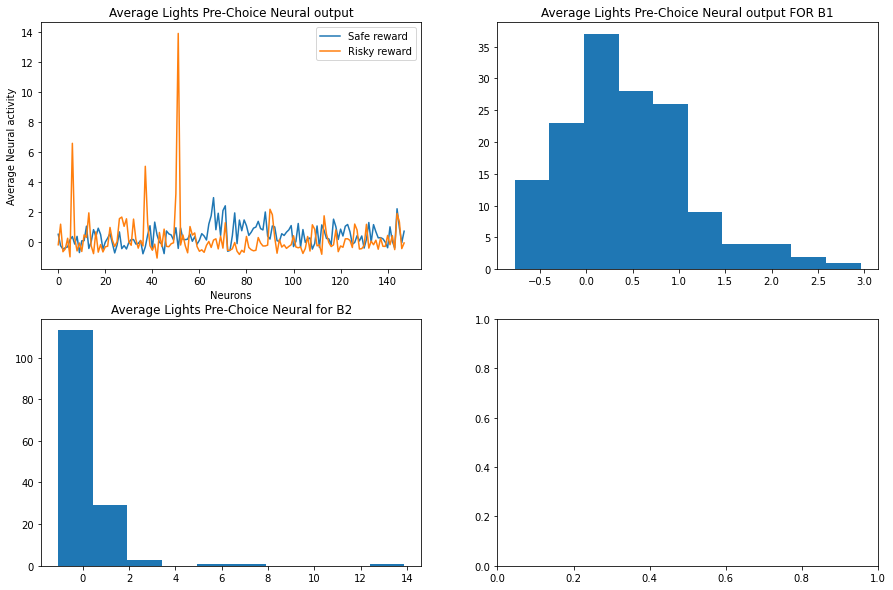

In [36]:
b1flat=np.array(b1light).flatten()
b2flat=np.array(b2light_new).flatten()

fig,axes =plt.subplots(nrows=2,ncols=2,figsize=(15,10))
plt.subplot(221)

plt.plot(b1light_av)
plt.plot(b2light_av)
plt.title("Average Lights Pre-Choice Neural output"),plt.ylabel("Average Neural activity"),plt.xlabel("Neurons")
plt.legend(["Safe reward","Risky reward"])
plt.subplot(222)
plt.title("Average Lights Pre-Choice Neural output FOR B1")
plt.hist(b1light_av)
plt.subplot(223)
plt.hist(b2light_av)
plt.title("Average Lights Pre-Choice Neural for B2")
plt.show()

### B1Deliberation
Event: 1 second nosepoke hold prior to lever extension\
Window: 2 sec\
Bin of event: Hold start at bin 1. Lever extension at bin 40

### B1PreDecision
Event: Time between lever extension and lever press\
Window: 0.5 sec\
Bin of event: lever press not included, but would occur in bin 41

### B1 Decision
Event: Lever Press\
Window: 0.6 sec\
Bin of event: Lever press occurs at bin 3

### B1Anticipation
Event: Time from lever press to outcome delivery\
Window: 1 sec\
Bin of event: Outcome delivery occurs at bin 20 Lever press not included but would occur immediately prior to bin 1.

### B1PostOutcome
Event: time following outcome delivery\
Window: 1.5 sec\
Bin of event: Outcome delivery not included, but would occur immediately prior to bin 1




In [18]:
## Block1
b1del=pd.read_csv(data_pathB1+"B1Deliberation.CSV", header=None)
b1del_av= np.nanmean(b1del,axis=1)

b1predec=pd.read_csv(data_pathB1+"B1PreDecision.CSV", header=None)
b1pred_av=np.nanmean(b1predec,axis=1)

b1dec=pd.read_csv(data_pathB1+"B1Decision.CSV", header=None)
b1dec_av=np.nanmean(b1dec,axis=1)

b1ant=pd.read_csv(data_pathB1+"B1Anticipation.CSV", header=None)
b1ant_av=np.nanmean(b1ant,axis=1)

b1post=pd.read_csv(data_pathB1+"B1PostOutcome.CSV", header=None)
b1post_av=np.nanmean(b1post,axis=1)
b1_averagae=[b1del_av,b1pred_av,b1dec_av,b1ant_av,b1post_av]

### Block2
b2del=pd.read_csv(data_pathB2+"B2Deliberation.CSV", header=None)
b2del_av= np.nanmean(b2del,axis=1)

b2predec=pd.read_csv(data_pathB2+"B2PreDecision.CSV", header=None)
b2pred_av=np.nanmean(b2predec,axis=1)

b2dec=pd.read_csv(data_pathB2+"B2Decision.CSV", header=None)
b2dec_av=np.nanmean(b2dec,axis=1)
b2ant=pd.read_csv(data_pathB2+"B2Anticipation.CSV", header=None)
b2ant_av=np.nanmean(b2ant,axis=1)

b2post=pd.read_csv(data_pathB2+"B2PostOutcome.CSV", header=None)
b2post_av=np.nanmean(b2post,axis=1)

av_light=[b1light_av,b2light_av]
av_del=[b1del_av,b2del_av]
av_pred=[b1pred_av,b2pred_av]
av_dec=[b1dec_av,b2dec_av]
av_ant=[b1ant_av,b2ant_av]
av_post=[b1post_av,b2post_av]

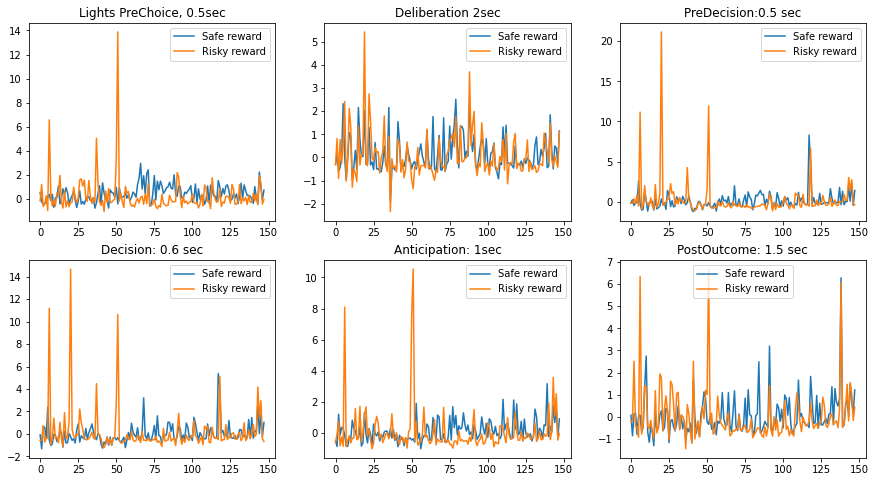

In [35]:
titles=["Lights PreChoice, 0.5sec","Deliberation 2sec","PreDecision:0.5 sec","Decision: 0.6 sec","Anticipation: 1sec","PostOutcome: 1.5 sec"]
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(15,8))
for av1,av2,av3,av4,av5,av6,ax,title in zip (av_light,av_del,av_pred,av_dec,av_ant,av_post, axes.flatten(),titles):
    axes.flatten()[0].plot(av1)
    axes.flatten()[0].legend(["Safe reward","Risky reward"]), axes.flatten()[0].set_title(titles[0])
    axes.flatten()[1].plot(av2)
    axes.flatten()[1].legend(["Safe reward","Risky reward"]), axes.flatten()[1].set_title(titles[1])
    axes.flatten()[2].plot(av3)
    axes.flatten()[2].legend(["Safe reward","Risky reward"]), axes.flatten()[2].set_title(titles[2])
    axes.flatten()[3].plot(av4)
    axes.flatten()[3].legend(["Safe reward","Risky reward"]), axes.flatten()[3].set_title(titles[3])
    axes.flatten()[4].plot(av5)
    axes.flatten()[4].legend(["Safe reward","Risky reward"]), axes.flatten()[4].set_title(titles[4])
    axes.flatten()[5].plot(av6)
    axes.flatten()[5].legend(["Safe reward","Risky reward"]), axes.flatten()[5].set_title(titles[5])
    

### Inferences

In [43]:
b1del.T

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,-1.984545,-3.204728,-2.163761,-1.16101,14.26651,2.624055,-0.645014,-1.119999,-0.971718,-2.430839,...,-0.504517,-0.609561,-0.382776,24.521531,-0.45239,-0.494608,-0.680120,11.784068,-0.488384,-0.710589
1,-1.984545,-3.204728,-2.163761,-1.16101,-1.68525,2.624055,-0.645014,-1.119999,-0.971718,-2.430839,...,12.757465,-0.609561,-0.382776,-0.671698,-0.45239,-0.494608,21.312796,-0.699825,-0.488384,-0.710589
2,-1.984545,11.705405,9.821828,-1.16101,-1.68525,-1.384594,-0.645014,-1.119999,-0.971718,-2.430839,...,12.757465,-0.609561,-0.382776,-0.671698,-0.45239,-0.494608,-0.680120,-0.699825,-0.488384,-0.710589
3,-1.984545,-3.204728,-2.163761,-1.16101,-1.68525,2.624055,-0.645014,-1.119999,-0.971718,-2.430839,...,-0.504517,-0.609561,-0.382776,-0.671698,-0.45239,-0.494608,-0.680120,-0.699825,-0.488384,-0.710589
4,-1.984545,-3.204728,9.821828,-1.16101,-1.68525,2.624055,-0.645014,-1.119999,-0.971718,-2.430839,...,-0.504517,-0.609561,-0.382776,24.521531,-0.45239,-0.494608,-0.680120,-0.699825,-0.488384,21.885609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-1.984545,-3.204728,-2.163761,-1.16101,-1.68525,-1.384594,-0.645014,-1.119999,-0.971718,-2.430839,...,-0.504517,-0.609561,-0.382776,-0.671698,-0.45239,-0.494608,-0.680120,-0.699825,-0.488384,-0.710589
796,-1.984545,-3.204728,-2.163761,-1.16101,-1.68525,-1.384594,-0.645014,-1.119999,-0.971718,-2.430839,...,-0.504517,-0.609561,-0.382776,24.521531,-0.45239,-0.494608,-0.680120,-0.699825,-0.488384,-0.710589
797,-1.984545,-3.204728,-2.163761,-1.16101,-1.68525,-1.384594,17.308295,-1.119999,-0.971718,-2.430839,...,-0.504517,-0.609561,-0.382776,-0.671698,-0.45239,-0.494608,-0.680120,-0.699825,-0.488384,-0.710589
798,-1.984545,-3.204728,-2.163761,-1.16101,-1.68525,-1.384594,-0.645014,-1.119999,-0.971718,-2.430839,...,-0.504517,-0.609561,-0.382776,-0.671698,-0.45239,-0.494608,-0.680120,-0.699825,-0.488384,-0.710589


Felix
